In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Diseases",
    shuffle=True,
    image_size = (256,256),
    batch_size = 32
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

(32, 256, 256, 3)
[0 1 2 1 1 1 0 0 0 1 1 0 2 1 1 1 0 1 0 0 0 1 0 1 1 1 2 1 1 0 0 0]


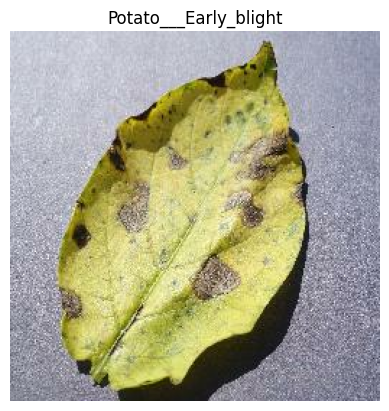

In [ ]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8")) 
    plt.axis("off")
    plt.title(class_names[label_batch[0]])
    print(image_batch.shape)
    print(label_batch.numpy())

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions(ds,train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True,shuffle_size=10000):

    ds_len=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(ds_len*train_split)
    train_ds = ds.take(train_size)
    rem_ds = ds.skip(len(train_ds))
    val_size = int(ds_len*val_split)
    val_ds = rem_ds.take(val_size)
    test_ds = rem_ds.skip(len(val_ds))
    return train_ds,test_ds,val_ds

In [ ]:
train_ds,test_ds,val_ds = get_dataset_partitions(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [ ]:
resize_rescale = tf.keras.Sequential([
    layers.Resizing(256,256),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
n_classes = 3
input_shape = (256,256,3)#image_size,image_size,channels
model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    epochs = 30,
    batch_size = 32,
    verbose = 1,
    validation_data = val_ds
    )

In [ ]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.4755 - loss: 0.8500


[0.8582890629768372, 0.4609375]

Actual Image :  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Predicted Image :  Potato___Early_blight
Confidence :  100.0


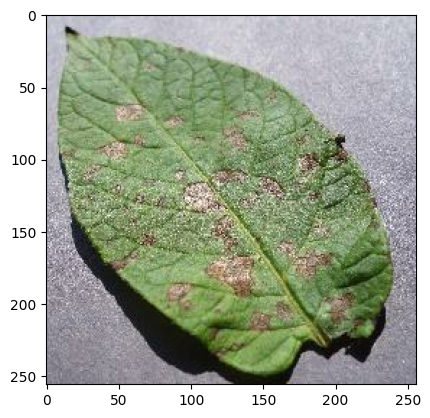

In [ ]:
for images_batch, labels_batch in test_ds.take(1):

    print("Actual Image : ", class_names[labels_batch[0]])
    batch_pred = model.predict(images_batch)
    print("Predicted Image : ", class_names[np.argmax(batch_pred[0])])
    print("Confidence : ", round(100 * (np.max(batch_pred[0])),2))
    plt.imshow(images_batch[0].numpy().astype("uint8"))


In [ ]:
model_version=1
model.export(f"../Python/potato_disease/{model_version}")

INFO:tensorflow:Assets written to: ../Python/potato_disease/1\assets


INFO:tensorflow:Assets written to: ../Python/potato_disease/1\assets


Saved artifact at '../Python/potato_disease/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2485433011856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2485433012048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2485433014352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2485433014544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2485433014736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2485337891152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2485337890576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2485337892496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2485337890384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2485337892112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2485337890768: TensorSpe